Missing Values:
 image       0
level       0
Label       0
filepath    0
dtype: int64

Summary Statistics:
               level
count  10016.000000
mean       0.536741
std        0.966254
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000


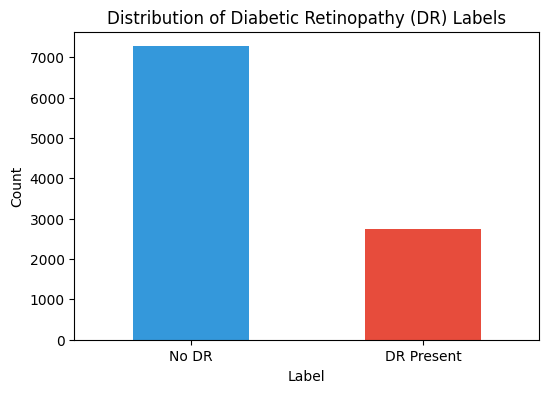


Image Size Distribution:
              Height         Width  Channels
count  10016.000000  10016.000000   10016.0
mean    2479.152955   3644.440495       3.0
std      472.384379    805.833300       0.0
min      315.000000    400.000000       3.0
25%     1957.000000   2816.000000       3.0
50%     2592.000000   3888.000000       3.0
75%     2592.000000   3888.000000       3.0
max     3456.000000   5184.000000       3.0


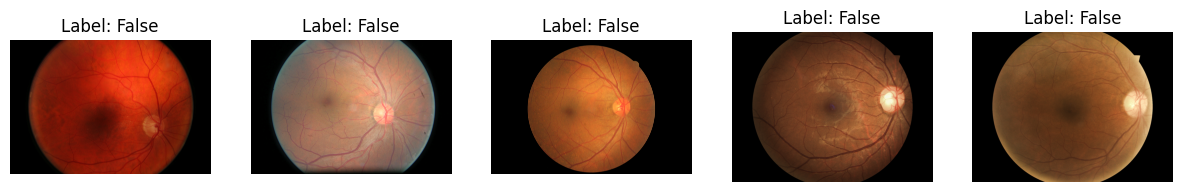


Train label distribution:
Label
False    4361
True     1648
Name: count, dtype: int64

Validation label distribution:
Label
False    1454
True      549
Name: count, dtype: int64

Test label distribution:
Label
False    1454
True      550
Name: count, dtype: int64


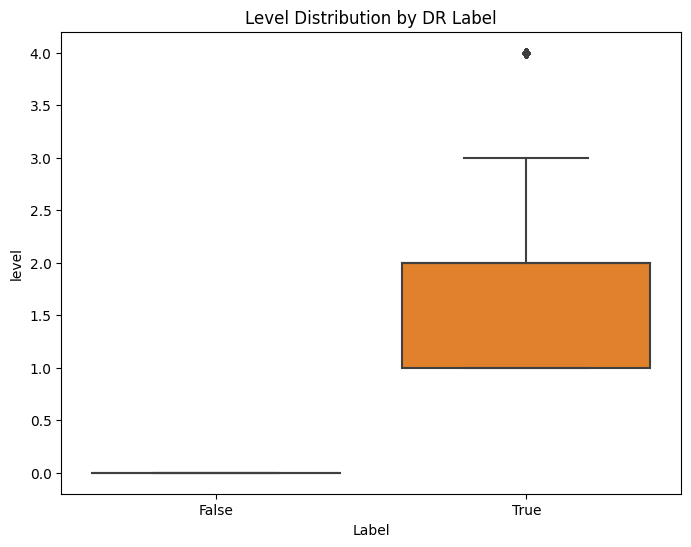

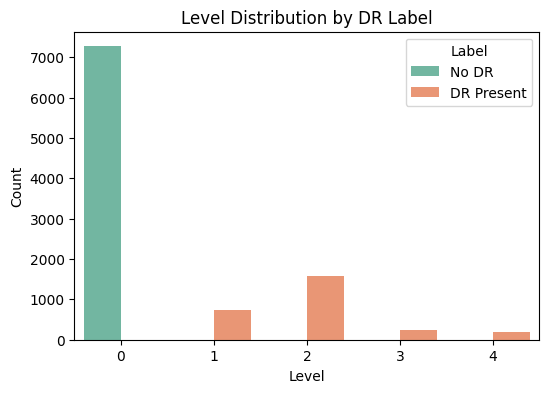

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split

# Load dataset
train_csv_path = "/kaggle/input/diabetic-retinopathy-detection/trainLabels.csv.zip"
train_images_dir = "/kaggle/input/diabetic-retinopathy-train-unzipped/train/"
df = pd.read_csv(train_csv_path)

# Preprocess dataset
img_number = 10016
df_train = df[:img_number].copy()

# Convert multiclass level to binary: 0 = No DR, 1 = DR Present
df_train["Label"] = df_train["level"].apply(lambda x: False if x == 0 else True)

# Add file path to the images
df_train["filepath"] = df_train["image"].apply(lambda x: os.path.join(train_images_dir, f"{x}.jpeg"))

# Train-Test Split
train_df, val_df = train_test_split(df_train, test_size=0.4, stratify=df_train["Label"], random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, stratify=val_df["Label"], random_state=42)

# 1. Check for missing values
print("Missing Values:\n", df_train.isnull().sum())

# 2. Summary statistics
print("\nSummary Statistics:\n", df_train.describe())

# 3. Class Distribution
plt.figure(figsize=(6,4))
df_train['Label'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Distribution of Diabetic Retinopathy (DR) Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['No DR', 'DR Present'], rotation=0)
plt.show()

# 4. Image Size Distribution
image_sizes = []
for filepath in df_train["filepath"]:
    img = cv2.imread(filepath)
    image_sizes.append(img.shape)

# Convert to DataFrame for easier analysis
image_size_df = pd.DataFrame(image_sizes, columns=["Height", "Width", "Channels"])
print("\nImage Size Distribution:\n", image_size_df.describe())

# 5. Visualize Some Sample Images
sample_images = df_train.sample(5)
plt.figure(figsize=(15, 10))
for i, (idx, row) in enumerate(sample_images.iterrows()):
    img = cv2.imread(row["filepath"])
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {row['Label']}")
    plt.axis('off')
plt.show()

# 6. Class Imbalance in train, validation, and test sets
train_label_dist = train_df["Label"].value_counts()
val_label_dist = val_df["Label"].value_counts()
test_label_dist = test_df["Label"].value_counts()

print(f"\nTrain label distribution:\n{train_label_dist}")
print(f"\nValidation label distribution:\n{val_label_dist}")
print(f"\nTest label distribution:\n{test_label_dist}")

# 7. Boxplot for 'level' by 'Label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='level', data=df_train)
plt.title('Level Distribution by DR Label')
plt.show()

# 8. Check Image Label Distribution in the Training Set
plt.figure(figsize=(6,4))
sns.countplot(x='level', hue='Label', data=df_train, palette='Set2')
plt.title('Level Distribution by DR Label')
plt.xlabel('Level')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No DR', 'DR Present'])
plt.show()
